<div class="alert alert-block alert-info" align=left><b></b>
Human Activity Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir("C:/Users/Nirmal Raj/Downloads/Class_sudeshna Sarkar/Intern insofe/UCI HAR Dataset/UCI HAR Dataset/Files")

In [3]:
os.getcwd()

'C:\\Users\\Nirmal Raj\\Downloads\\Class_sudeshna Sarkar\\Intern insofe\\UCI HAR Dataset\\UCI HAR Dataset\\Files'

In [4]:
data = pd.read_csv('X_train.txt',sep = "\t",header = None)
data1 = pd.read_csv('y_train.txt',sep = "\t",header = None)
data2 = pd.read_csv('X_test.txt',sep = "\t",header = None)
data3 = pd.read_csv('y_test.txt',sep = "\t",header = None)
#subject_train  = pd.read_csv('subject_train.txt',header = None)
#subject_test = pd.read_csv('subject_test.txt',header = None)

In [5]:
X_tra = [[float(number) for number in data[0].iloc[line].split()] for line in range(len(data))]
X_te = [[float(number) for number in data2[0].iloc[line].split()] for line in range(len(data2))]
X_tr = pd.DataFrame(X_tra)
X_ts = pd.DataFrame(X_te)

In [6]:
features = pd.read_csv('features.txt',sep = "\t",header = None)
features['col_name'] = str(0)
for i in range(len(features)):
    words = features[0].iloc[i].split()
    features['col_name'].iloc[i] = words[1]

In [7]:
Features = features.drop([0], axis=1)

In [8]:
X_tr.columns = X_tr.columns[:0].tolist() + Features['col_name'].values.tolist()
X_ts.columns = X_ts.columns[:0].tolist() + Features['col_name'].values.tolist()
X_train = X_tr
X_test = X_ts
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)


In [9]:
y_train = data1.rename(columns = {0:"Activity"})
y_test = data3.rename(columns = {0:"Activity"})
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

y_train :  (7352, 1)
y_test :  (2947, 1)


In [10]:
# sub_train = subject_train.rename(columns = {0:'Subject'})
# sub_test = subject_test.rename(columns = {0:'Subject'})
# X_train['Subject'] = sub_train
# X_test['Subject'] = sub_test
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)
y_train :  (7352, 1)
y_test :  (2947, 1)


In [11]:
y_train.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)
y_test.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)

In [12]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [13]:
print('Train Shape : ',train.shape)
print('Test Shape : ',test.shape)

Train Shape :  (7352, 562)
Test Shape :  (2947, 562)


In [14]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


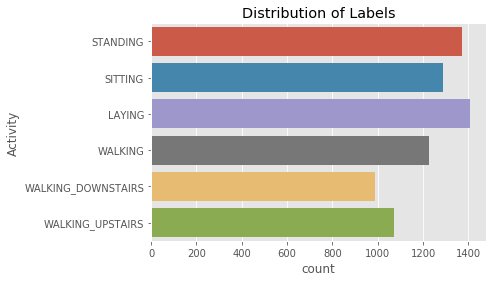

In [15]:
ax = sns.countplot(y = train['Activity'])
ax.set_title('Distribution of Labels')
plt.show()

In [16]:
y_train=train['Activity']
X_train=train.drop('Activity',axis=1)
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)

X_train :  (7352, 561)
y_train :  (7352,)


In [17]:
y_test=test['Activity']
X_test=test.drop('Activity',axis=1)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_test :  (2947, 561)
y_test :  (2947,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
linear_components = pd.DataFrame(data = X_train,columns =['LD1','LD2','LD3','LD4','LD5'])

In [21]:
linear_components.tail(3)

,LD1,LD2,LD3,LD4,LD5
7349,14.363545,0.965910,0.187389,-6.604889,-1.077141
7350,14.592779,1.905171,-0.237764,-7.295756,-0.711986
7351,15.564010,2.154951,-0.500240,-6.360474,-0.488940


In [22]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.73179996 0.17624642 0.05461643 0.02824873 0.00908846]


<Figure size 432x288 with 0 Axes>

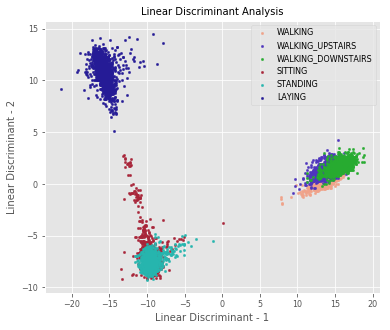

In [23]:
plt.figure()
plt.figure(figsize=(6,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Linear Discriminant - 1',fontsize=10)
plt.ylabel('Linear Discriminant - 2',fontsize=10)
plt.title("Linear Discriminant Analysis",fontsize=10)
targets = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
colors = ['#f0a289','#4e35bd','#27ab30','#a82539','#26b5ae','#251b96']
for target, color in zip(targets,colors):
    indicesToKeep = train['Activity'] == target
    plt.scatter(linear_components.loc[indicesToKeep, 'LD1']
               ,linear_components.loc[indicesToKeep, 'LD2'], c = color, s = 5)

plt.legend(targets,prop={'size': 8})

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from datetime import datetime

sv = SVC()
rf = RandomForestClassifier()

param_grid_rf = {"n_estimators": [30,50,60],
                 "max_depth": [2,3,5,7],
                 "min_samples_leaf": [2, 4]}

param_grid_sv = {'kernel': ['rbf','linear'], 
                  'gamma': [1e-3, 1e-4],
                  'C'    : [1, 10, 100, 1000]}

classifiers = [['Random_Forest_Tuned : ',GridSearchCV(rf,param_grid=param_grid_rf,cv=5,scoring='accuracy')],
               ['Xg_boost : ',XGBClassifier()],
               ['Bagging Classifier : ',BaggingClassifier()],
               ['Support Vector Machines_Tuned : ',GridSearchCV(sv,param_grid=param_grid_sv,cv=5,scoring='accuracy')]]

# class_predictions = []
for name,model in classifiers:
    model=model
    start_time = datetime.now()
    model.fit(X_train,y_train)
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
#   class_predictions.append(accuracy_score(y_test,predictions))
    print(f'{name}_Train_Accuracy :',accuracy_score(y_train,predictions))
    print(f'{name}_Test_Accuracy :',accuracy_score(y_test,predictions1))
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    print('--------------------------------------------------')

Random_Forest_Tuned : _Train_Accuracy : 0.9868063112078346
Random_Forest_Tuned : _Test_Accuracy : 0.9599592806243638
Duration: 0:00:59.677413
--------------------------------------------------
Xg_boost : _Train_Accuracy : 0.9912948857453754
Xg_boost : _Test_Accuracy : 0.9538513742789277
Duration: 0:00:05.205298
--------------------------------------------------
Bagging Classifier : _Train_Accuracy : 0.9982317736670294
Bagging Classifier : _Test_Accuracy : 0.9626739056667798
Duration: 0:00:00.311018
--------------------------------------------------
Support Vector Machines_Tuned : _Train_Accuracy : 0.9870783460282916
Support Vector Machines_Tuned : _Test_Accuracy : 0.9643705463182898
Duration: 0:00:47.653725
--------------------------------------------------


## Deep Neural Network Techniques with LDA

In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [26]:
X_test.shape

(2947, 5)

In [27]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras import optimizers
import tensorflow as tf
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=5))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 4,934
Trainable params: 4,934
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_history = model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 1s 134us/step - loss: 0.6919 - acc: 0.7768 - val_loss: 0.1082 - val_acc: 0.9644
Epoch 2/50
7352/7352 [==============================] - 0s 36us/step - loss: 0.1665 - acc: 0.9445 - val_loss: 0.1058 - val_acc: 0.9630
Epoch 3/50
7352/7352 [==============================] - 0s 29us/step - loss: 0.1192 - acc: 0.9635 - val_loss: 0.1139 - val_acc: 0.9634
Epoch 4/50
7352/7352 [==============================] - 0s 49us/step - loss: 0.1114 - acc: 0.9689 - val_loss: 0.1167 - val_acc: 0.9623
Epoch 5/50
7352/7352 [==============================] - 1s 71us/step - loss: 0.0944 - acc: 0.9712 - val_loss: 0.1195 - val_acc: 0.9620
Epoch 6/50
7352/7352 [==============================] - 0s 57us/step - loss: 0.0844 - acc: 0.9736 - val_loss: 0.1514 - val_acc: 0.9583
Epoch 7/50
7352/7352 [==============================] - 0s 61us/step - loss: 0.0887 - acc: 0.

In [31]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


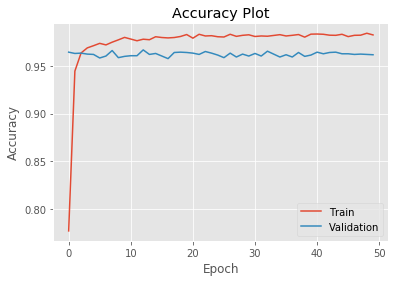

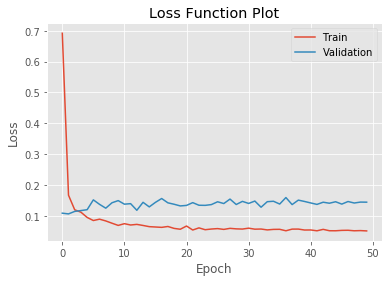

In [32]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show() 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Finding Best Parameters

In [33]:
def model_def(h_activation, o_activation, kernel_init):
    model=Sequential()
    model.add(Dense(25, input_dim = 5, activation=h_activation, kernel_initializer=kernel_init))
    model.add(Dense(15, activation=h_activation, kernel_initializer=kernel_init))
    model.add(Dense(6, activation=o_activation, kernel_initializer=kernel_init))
    return model 

#### Store the best Parameter

In [34]:
best_params={}

#### Finding the Best Learning Rate

    Using logarithmic scale randomly generate values between 0.0001 to 1 

In [35]:
NUM_LR = 20
lrs = [round(i, 4) for i in list(10 ** (-4 * np.random.rand(NUM_LR)))]
lrs

[0.1458,
 0.3642,
 0.0009,
 0.8463,
 0.0234,
 0.0005,
 0.142,
 0.001,
 0.0002,
 0.0009,
 0.0202,
 0.039,
 0.0596,
 0.1285,
 0.0326,
 0.0092,
 0.0056,
 0.0293,
 0.017,
 0.0001]

In [36]:
hist_loss = []
for lr in lrs:
    np.random.seed(123)
    lr_model = model_def(h_activation='relu', o_activation='softmax', kernel_init='normal')
    # Compile model
    sgd = optimizers.SGD(lr=lr)
    lr_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    # Fit the model
    lr_model_history = lr_model.fit(X_train, y_train, validation_split=0.2, epochs=1,shuffle=True, steps_per_epoch=50, validation_steps=50)
    hist_loss.append(lr_model_history.history['loss'])

Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 22ms/step - loss: 1.0251 - acc: 0.6204 - val_loss: 0.3113 - val_acc: 0.8436
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 21ms/step - loss: 0.7312 - acc: 0.6684 - val_loss: 0.2165 - val_acc: 0.9089
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 24ms/step - loss: 1.7928 - acc: 0.1457 - val_loss: 1.7920 - val_acc: 0.1468
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 22ms/step - loss: 1.4827 - acc: 0.3767 - val_loss: 1.3089 - val_acc: 0.3936
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 2s 38ms/step - loss: 1.7698 - acc: 0.3545 - val_loss: 1.7323 - val_acc: 0.4847
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 23ms/ste

In [37]:
# Get the lr and loss Dataframe
loss_lr = pd.DataFrame([lrs,hist_loss]).T  
#Give the coloumn names
loss_lr.columns=['lr', 'loss']
#Sort the values and reset the index
loss_lr=loss_lr.sort_values('loss').reset_index().drop('index',axis=1)
loss_lr

,lr,loss
0,0.3642,[0.7312372055649757]
1,0.1458,[1.0250588595867156]
2,0.142,[1.042813491821289]
3,0.1285,[1.110376359820366]
4,0.8463,[1.4827309930324555]
5,0.0596,[1.6013749313354493]
6,0.039,[1.7292368125915527]
7,0.0326,[1.7505913519859313]
8,0.0293,[1.7587352752685548]
9,0.0234,[1.769846546649933]


In [38]:
#pick the top lr
best_params['best_learning_rate'] = loss_lr.loc[:,'lr'][0]

#### Build Model With Best Learning Rate

In [39]:
bst_lr_model = model_def(h_activation='relu', o_activation='softmax', kernel_init='normal')

In [40]:
bst_lr_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_65 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_66 (Dense)             (None, 6)                 96        
Total params: 636
Trainable params: 636
Non-trainable params: 0
_________________________________________________________________


In [41]:
sgd = optimizers.SGD(lr=best_params['best_learning_rate'])
bst_lr_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [42]:
bst_lr_model_history = bst_lr_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, shuffle=True)

Train on 5881 samples, validate on 1471 samples
Epoch 1/50
5881/5881 [==============================] - 1s 252us/step - loss: 0.4557 - acc: 0.8099 - val_loss: 0.0369 - val_acc: 0.9884
Epoch 2/50
5881/5881 [==============================] - 0s 31us/step - loss: 0.0579 - acc: 0.9808 - val_loss: 0.0311 - val_acc: 0.9878
Epoch 3/50
5881/5881 [==============================] - 0s 31us/step - loss: 0.0502 - acc: 0.9813 - val_loss: 0.0376 - val_acc: 0.9864
Epoch 4/50
5881/5881 [==============================] - 0s 31us/step - loss: 0.0468 - acc: 0.9820 - val_loss: 0.0311 - val_acc: 0.9925
Epoch 5/50
5881/5881 [==============================] - 0s 31us/step - loss: 0.0439 - acc: 0.9832 - val_loss: 0.0682 - val_acc: 0.9728
Epoch 6/50
5881/5881 [==============================] - 0s 32us/step - loss: 0.0436 - acc: 0.9833 - val_loss: 0.0279 - val_acc: 0.9918
Epoch 7/50
5881/5881 [==============================] - 0s 33us/step - loss: 0.0449 - acc: 0.9835 - val_loss: 0.0351 - val_acc: 0.9871
Epoch 

In [43]:
print(bst_lr_model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


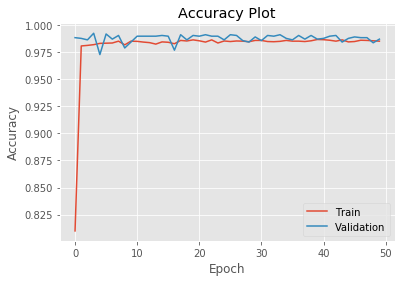

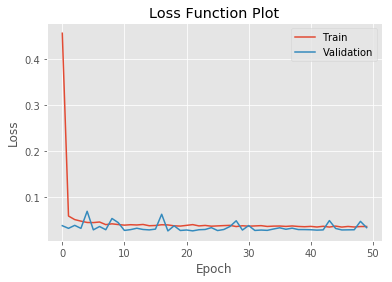

In [44]:
plt.plot(bst_lr_model_history.history['acc'])
plt.plot(bst_lr_model_history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show() 
plt.plot(bst_lr_model_history.history['loss'])
plt.plot(bst_lr_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()